In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)
library(viridis)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: viridisLite


In [2]:
### All cells

In [3]:
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/scCellOutput_PCA20_88_rep/"

In [4]:
myfile = paste0(myfolder, "qtl_results_all.txt")
df = read.csv(myfile, sep = "\t")
nrow(df)
head(df,2)

[1] 985491

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000224879,2_79491322_C_T,9.891695e-05,-0.006536284,0.001678883,0,2,79385500,79412649,7552,89,1.2044,49.05444,2,79491322,T,1,0.1179775,0.0158177
ENSG00000224879,2_79512591_G_A,1.254223e-03,0.005349045,0.001657974,0,2,79385500,79412649,7552,89,1.2044,49.05444,2,79512591,A,1,0.1404494,0.6758368


In [5]:
bulk_matched_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_PCA20_88_206/"
leads = read.csv(paste0(bulk_matched_folder,"top_qtl_results_all.txt"), sep = "\t")
nrow(leads)

[1] 43103

In [6]:
leads <- leads[-which(duplicated(leads$feature_id)),]
leads$q_value = qvalue(leads$empirical_feature_p_value)$qvalues
nrow(leads[leads$q_value < 0.05,])

[1] 3169

In [7]:
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
19_54622488_C_T,8.729855e-03,-0.1991305,0.07593285,0.602212835,19,54641444,54659419,88,88,0.5684955,27.30333,19,54622488,T,1,0.4204545,0.3805144,ENSG00000088038,0.63886109
19_54331892_A_G,2.928238e-05,-0.2657114,0.06358288,0.009652824,19,54412589,54447195,88,88,0.7696934,73.05146,19,54331892,G,1,0.2727273,0.7907998,ENSG00000105605,0.08022295


In [8]:
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"
leads_all = read.csv(paste0(bulk_folder,"top_qtl_results_all.txt"), sep = "\t")
nrow(leads_all)

[1] 49916

In [9]:
leads_all <- leads_all[-which(duplicated(leads_all$feature_id)),]
leads_all$q_value = qvalue(leads_all$empirical_feature_p_value)$qvalues
nrow(leads_all[leads_all$q_value < 0.05,])

[1] 15646

In [10]:
T = 0.05
leads_sign = leads[leads$q_value < T,]
leads_all_sign = leads_all[leads_all$q_value < T,]

In [11]:
df1 = inner_join(df, leads_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df1)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 185

In [12]:
cor.test(df1$beta.bulk, df1$beta.sc)


	Pearson's product-moment correlation

data:  df1$beta.bulk and df1$beta.sc
t = 11.342, df = 183, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5491272 0.7200242
sample estimates:
      cor 
0.6424961 


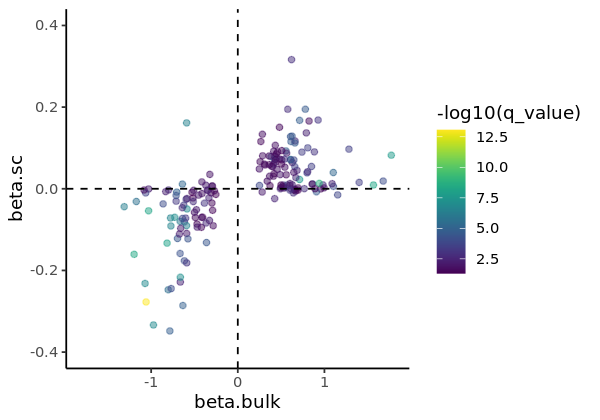

In [13]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(df1, aes(x = beta.bulk, y = beta.sc, colour = -log10(q_value))) + geom_point(alpha = 0.5) + theme_classic() +
    xlim(c(-1.8,1.8)) + ylim(c(-0.4,0.4)) + scale_colour_viridis() +
    geom_hline(yintercept = 0, lty=2) + geom_vline(xintercept = 0, lty=2)

In [14]:
# ggplot(df1, aes(x = -log10(p_value.bulk), y = -log10(p_value.sc), colour = q_value)) + geom_point(alpha = 0.5) + 
#     theme_classic() + geom_abline(slope = 1, lty=2) + xlim(c(0,21)) + ylim(c(0,21))

In [15]:
df2 = inner_join(df, leads_all_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df2)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 802

In [16]:
cor.test(df1$beta.bulk, df1$beta.sc)


	Pearson's product-moment correlation

data:  df1$beta.bulk and df1$beta.sc
t = 11.342, df = 183, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5491272 0.7200242
sample estimates:
      cor 
0.6424961 


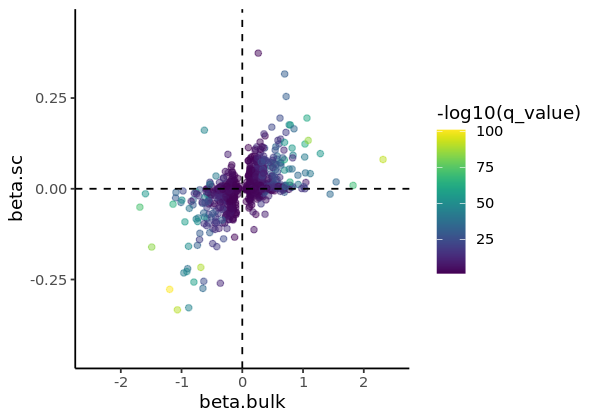

In [17]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(df2, aes(x = beta.bulk, y = beta.sc, colour = -log10(q_value))) + geom_point(alpha = 0.5) + theme_classic() +
    xlim(c(-2.5,2.5)) + ylim(c(-0.45,0.45)) + scale_colour_viridis() +
    geom_hline(yintercept = 0, lty=2) + geom_vline(xintercept = 0, lty=2)

In [18]:
# ggplot(df2, aes(x = -log10(p_value.bulk), y = -log10(p_value.sc), colour = q_value)) + geom_point(alpha = 0.5) + 
#     theme_classic() + geom_abline(slope = 1, lty=2) + xlim(c(0,110))# + ylim(c(0,21))

In [19]:
#### 5 cells only

In [20]:
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/scCellOutput_PCA20_88_5cell/"

In [21]:
myfile = paste0(myfolder, "qtl_results_all.txt")
df3 = read.csv(myfile, sep = "\t")
head(df3,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000252031,2_79781587_C_T,0.040509405,0.03665044,0.01789121,2.141476e-225,2,79863988,79864089,444,89,0.09308564,143.95197,2,79781587,T,1,0.3314607,0.01585509
ENSG00000203363,2_85953126_T_C,0.005624522,0.06522775,0.02355725,3.087689e-197,2,85913176,85914170,444,89,1.88531855,21.54293,2,85953126,C,1,0.4438202,1.00000000


In [22]:
df4 = inner_join(df3, leads_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df4)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 248

In [23]:
cor.test(df4$beta.bulk, df4$beta.sc)


	Pearson's product-moment correlation

data:  df4$beta.bulk and df4$beta.sc
t = 10.154, df = 246, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4493018 0.6256648
sample estimates:
      cor 
0.5434529 


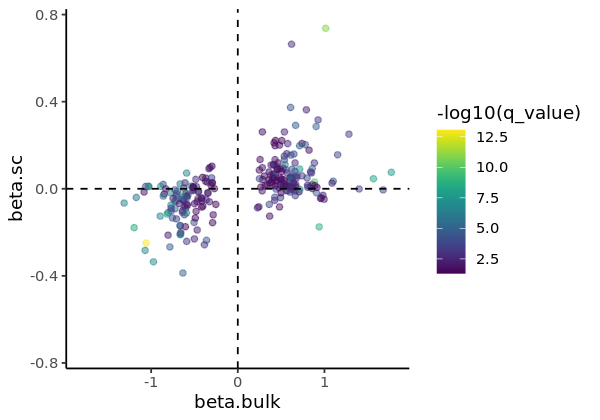

In [24]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(df4, aes(x = beta.bulk, y = beta.sc, colour = -log10(q_value))) + geom_point(alpha = 0.5) + theme_classic() +
    xlim(c(-1.8,1.8)) + ylim(c(-0.75,0.75)) + scale_colour_viridis() +
    geom_hline(yintercept = 0, lty=2) + geom_vline(xintercept = 0, lty=2)

In [25]:
df5 = inner_join(df3, leads_all_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1048

In [26]:
cor.test(df5$beta.bulk, df5$beta.sc)


	Pearson's product-moment correlation

data:  df5$beta.bulk and df5$beta.sc
t = 15.488, df = 1046, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3813191 0.4799066
sample estimates:
      cor 
0.4319021 


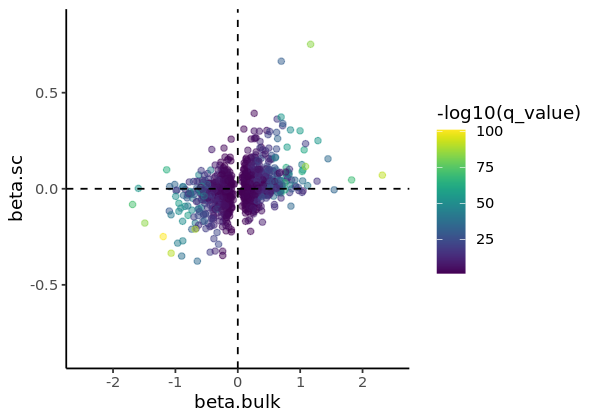

In [27]:
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(df5, aes(x = beta.bulk, y = beta.sc, colour = -log10(q_value))) + geom_point(alpha = 0.5) + theme_classic() +
    xlim(c(-2.5,2.5)) + ylim(c(-0.85,0.85)) + scale_colour_viridis() +
    geom_hline(yintercept = 0, lty=2) + geom_vline(xintercept = 0, lty=2)